In [1]:
from notebook_utils import *

In [2]:
embeddings = load_all_embeddings(GHZExperimentID.EMBED, False)
count = 0
for (hardware_spec, embeddings_dict) in embeddings.items():
    count += len(embeddings_dict.keys())
count

1275

In [3]:
files_path = get_experiment_name_path(GHZExperimentID.EMBED)
files_path = os.path.join(get_project_path(), files_path)
file_path = os.path.join(files_path, "guarantees_embed.csv")
df = pd.read_csv(file_path)
df

,hardware,my_guarantee,ibm_simulated,diff
0,fake_tenerife,0.923,0.915,0.008
1,fake_athens,0.979,0.981,-0.002
2,fake_belem,0.973,0.967,0.006
3,fake_bogota,0.971,0.896,0.075
4,fake_burlington,0.966,0.967,-0.001
5,fake_essex,0.969,0.964,0.005
6,fake_lima,0.985,0.985,0.000
7,fake_london,0.981,0.988,-0.007
8,fake_manila,0.982,0.978,0.004
9,fake_ourense,0.986,0.987,-0.001


In [40]:
df.describe()

,my_guarantee,ibm_simulated,diff
count,44.000000,44.000000,44.000000
mean,0.977045,0.902227,0.074818
std,0.014056,0.225895,0.221609
min,0.923000,0.062000,-0.009000
25%,0.972500,0.953250,0.002000
50%,0.982000,0.972000,0.006000
75%,0.986000,0.982000,0.019750
max,0.990000,0.988000,0.919000


In [41]:
df["hardware"] = df["hardware"].str.replace("fake_", "", regex=False).str.capitalize()
df

,hardware,my_guarantee,ibm_simulated,diff
0,Tenerife,0.923,0.915,0.008
1,Athens,0.979,0.981,-0.002
2,Belem,0.973,0.967,0.006
3,Bogota,0.971,0.896,0.075
4,Burlington,0.966,0.967,-0.001
5,Essex,0.969,0.964,0.005
6,Lima,0.985,0.985,0.000
7,London,0.981,0.988,-0.007
8,Manila,0.982,0.978,0.004
9,Ourense,0.986,0.987,-0.001


In [42]:
df.sort_values('diff', ascending=False).to_csv(os.path.join(files_path, "guarantees_embed_sorted.csv"), index=False)

## Code to generate the paper table 

In [5]:
def get_opt_file_data(file_name) -> Dict[str, Tuple[float, float, float]]:
    files_path = get_experiment_name_path(GHZExperimentID.EMBED)
    answer = dict()
    opt_file_path = os.path.join(get_project_path(), files_path, file_name)

    opt_file = open(opt_file_path)
    
    for line in opt_file.readlines()[1:]:
        elements = line.split(",")
        hardware = elements[0]
        my_guarantee = float(elements[1])
        ibm_guarantee = float(elements[2])
        diff = float(elements[3])
        
        assert hardware not in answer.keys()
        
        answer[hardware] = (my_guarantee, ibm_guarantee, diff)
    opt_file.close()
    
    return answer

In [7]:
op2_data = get_opt_file_data("guarantees_embed_sorted2.csv")
op3_data = get_opt_file_data("guarantees_embed_sorted3.csv")

hardwares = []
my_guarantees = []
ibm_guarantees2 = []
ibm_guarantees3 = []
diffs2 = []
diffs3 = []

assert len(op2_data.keys()) == len(op3_data.keys())

for (hardware, val2) in op2_data.items():
    
    my_guarantee = val2[0]
    op2_guarantee = val2[1]
    diff2 = val2[2]
    
    assert hardware in op3_data.keys()
    val3 = op3_data[hardware]
    my_guarantee_ = val3[0]
    assert my_guarantee == my_guarantee_
    op3_guarantee = val3[1]
    diff3 = val3[2]
    
    
    hardwares.append(hardware)
    my_guarantees.append(my_guarantee)
    ibm_guarantees2.append(op2_guarantee)
    diffs2.append(diff2)
    
    ibm_guarantees3.append(op3_guarantee)
    diffs3.append(diff3)
    
    

df = pd.DataFrame.from_dict({
    'hardware': hardwares,
    'my_guarantee': my_guarantees,
    'opt_level2': ibm_guarantees2,
    'diffs2': diffs2,
    'opt_level3': ibm_guarantees3,
    'diff3': diffs3
}) 

df.to_csv(os.path.join(get_project_path(), get_experiment_name_path(GHZExperimentID.EMBED), "paper_table.csv"))




In [12]:
round(sum(diffs2)/len(diffs2)*100, 3)

5.723

In [13]:
round(sum(diffs3)/len(diffs3)*100, 3)

7.482

In [ ]:
# df
df.drop(inplace=True, axis=1, columns=["diffs2", "diff3"])
# df

In [14]:
melted_df = pd.melt(
    df,
    id_vars=["hardware"],  # Columns to keep
    value_vars=["my_guarantee", "opt_level2", "opt_level3"],  # Columns to unpivot
    var_name="guarantee",  # New column for guarantee names
    value_name="values",   # New column for values
)
melted_df

,hardware,guarantee,values
0,Manhattan,my_guarantee,0.981
1,Rochester,my_guarantee,0.947
2,Sydney,my_guarantee,0.986
3,Bogota,my_guarantee,0.971
4,Cairo,my_guarantee,0.989
...,...,...,...
127,Tokyo,opt_level3,0.956
128,Santiago,opt_level3,0.985
129,Toronto,opt_level3,0.865
130,London,opt_level3,0.988


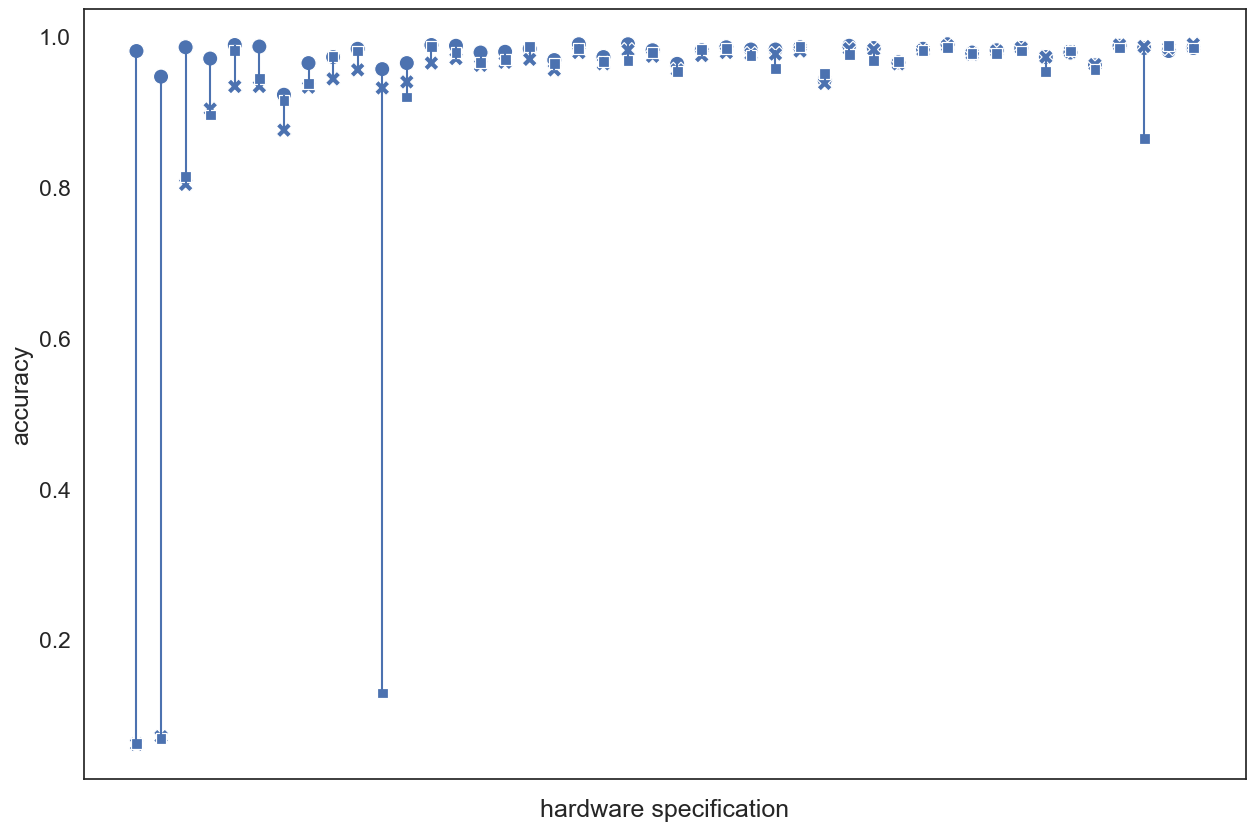

In [35]:
plt.figure(figsize=(15, 10))
sns.set(style="white", font_scale=1.5)

g = sns.scatterplot(data=melted_df, y="values", x="hardware", style="guarantee", s=120, legend=False)

g.set(xticklabels=[])
g.set(ylabel="accuracy")
g.set(xlabel="hardware specification")

for (hardware, my_guarantee, opt2_guarantee, opt3_guarantee) in zip(hardwares, my_guarantees, ibm_guarantees2, ibm_guarantees3):
    x = hardware
    ymin = min([opt2_guarantee, opt3_guarantee, my_guarantee])
    ymax = max([opt2_guarantee, opt3_guarantee, my_guarantee])
    g.vlines([x], ymin, ymax)
    

plt.savefig(os.path.join(files_path, f"ghz_scatter.pdf"), format='pdf')

